In [196]:
import pandas as pd
import numpy as np

safi = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-06-13/safi_data.csv',
                   dtype={'respondent_wall_type': np.string_,'items_owned': np.string_})

In [197]:
safi.describe()

,key_ID,no_membrs,years_liv,rooms,liv_count,no_meals
count,131.000000,131.00000,131.000000,131.000000,131.000000,131.000000
mean,85.473282,7.19084,23.053435,1.740458,2.366412,2.603053
std,63.151628,3.17227,16.913041,1.092547,1.082775,0.491143
min,1.000000,2.00000,1.000000,1.000000,1.000000,2.000000
25%,32.500000,5.00000,12.000000,1.000000,1.000000,2.000000
50%,66.000000,7.00000,20.000000,1.000000,2.000000,3.000000
75%,138.000000,9.00000,27.500000,2.000000,3.000000,3.000000
max,202.000000,19.00000,96.000000,8.000000,5.000000,3.000000


In [198]:

print (safi.village.unique())
print (safi.affect_conflicts.unique())

['God' 'Chirodzo' 'Ruaca']
[nan 'once' 'never' 'more_once' 'frequently']


In [199]:
from math import nan


def transformConflicts(r: str):
    if r == 'once':
        return 1
    elif r == 'never':
        return 0
    elif r == 'more_once':
        return 5
    elif r == 'frequently':
        return 10
    return nan


def transformMember(r: str):
    if r == 'yes':
        return 1
    elif r == 'no':
        return 0
    return nan

In [200]:
safi['year'] = safi['interview_date'].str.slice(0, 4)
safi['item_count'] = safi['items_owned'].apply(lambda r: len(r.__str__().split(';')))
safi['lack_food'] = safi['months_lack_food'].apply(lambda r: len(r.__str__().split(';')))
safi['conflicts'] = safi['affect_conflicts'].apply(lambda r: transformConflicts(r))
safi['member'] = safi['memb_assoc'].apply(lambda r: transformMember(r))

safi

,key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID,year,item_count,lack_food,conflicts,member
0,1,God,2016-11-17T00:00:00Z,3,4,muddaub,1,NaN,NaN,1,bicycle;television;solar_panel;table,2,Jan,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef,2016,4,1,NaN,NaN
1,1,God,2016-11-17T00:00:00Z,7,9,muddaub,1,yes,once,3,cow_cart;bicycle;radio;cow_plough;solar_panel;...,2,Jan;Sept;Oct;Nov;Dec,uuid:099de9c9-3e5e-427b-8452-26250e840d6e,2016,8,5,1.0,1.0
2,3,God,2016-11-17T00:00:00Z,10,15,burntbricks,1,NaN,NaN,1,solar_torch,2,Jan;Feb;Mar;Oct;Nov;Dec,uuid:193d7daf-9582-409b-bf09-027dd36f9007,2016,1,6,NaN,NaN
3,4,God,2016-11-17T00:00:00Z,7,6,burntbricks,1,NaN,NaN,2,bicycle;radio;cow_plough;solar_panel;mobile_phone,2,Sept;Oct;Nov;Dec,uuid:148d1105-778a-4755-aa71-281eadd4a973,2016,5,4,NaN,NaN
4,5,God,2016-11-17T00:00:00Z,7,40,burntbricks,1,NaN,NaN,4,motorcyle;radio;cow_plough;mobile_phone,2,Aug;Sept;Oct;Nov,uuid:2c867811-9696-4966-9866-f35c3e97d02d,2016,4,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,126,Ruaca,2017-05-18T00:00:00Z,3,7,burntbricks,1,no,more_once,3,motorcyle;radio;solar_panel,3,Oct;Nov;Dec,uuid:69caea81-a4e5-4e8d-83cd-9c18d8e8d965,2017,3,3,5.0,0.0
127,193,Ruaca,2017-06-04T00:00:00Z,7,10,cement,3,no,more_once,3,car;lorry;television;radio;sterio;cow_plough;s...,3,none,uuid:5ccc2e5a-ea90-48b5-8542-69400d5334df,2017,12,1,5.0,0.0
128,194,Ruaca,2017-06-04T00:00:00Z,4,5,muddaub,1,no,more_once,1,radio;solar_panel;solar_torch;mobile_phone,3,Sept;Oct;Nov,uuid:95c11a30-d44f-40c4-8ea8-ec34fca6bbbf,2017,4,3,5.0,0.0
129,199,Chirodzo,2017-06-04T00:00:00Z,7,17,burntbricks,2,yes,more_once,2,cow_cart;lorry;motorcyle;computer;television;r...,3,Nov;Dec,uuid:ffc83162-ff24-4a87-8709-eff17abc0b3b,2017,12,2,5.0,1.0


In [201]:
safi['member'].value_counts()

member
0.0    59
1.0    33
Name: count, dtype: int64

In [202]:
from functools import reduce


list = safi.items_owned.to_list()
words = reduce(lambda a,s:a+';'+s.__str__(),list, "").split(';')


In [203]:
items = pd.DataFrame(words)[0].unique()
items.sort()
items

array(['', 'bicycle', 'car', 'computer', 'cow_cart', 'cow_plough',
       'electricity', 'fridge', 'lorry', 'mobile_phone', 'motorcyle',
       'nan', 'radio', 'sofa_set', 'solar_panel', 'solar_torch', 'sterio',
       'table', 'television'], dtype=object)

In [204]:
safi.columns

Index(['key_ID', 'village', 'interview_date', 'no_membrs', 'years_liv',
       'respondent_wall_type', 'rooms', 'memb_assoc', 'affect_conflicts',
       'liv_count', 'items_owned', 'no_meals', 'months_lack_food',
       'instanceID', 'year', 'item_count', 'lack_food', 'conflicts', 'member'],
      dtype='object')

In [205]:
safi_plot_data = safi.loc[:,['item_count','rooms','village','no_membrs','years_liv','memb_assoc','respondent_wall_type','no_meals','lack_food','conflicts','member']]

TypeError: regplot() got an unexpected keyword argument 'alpha'

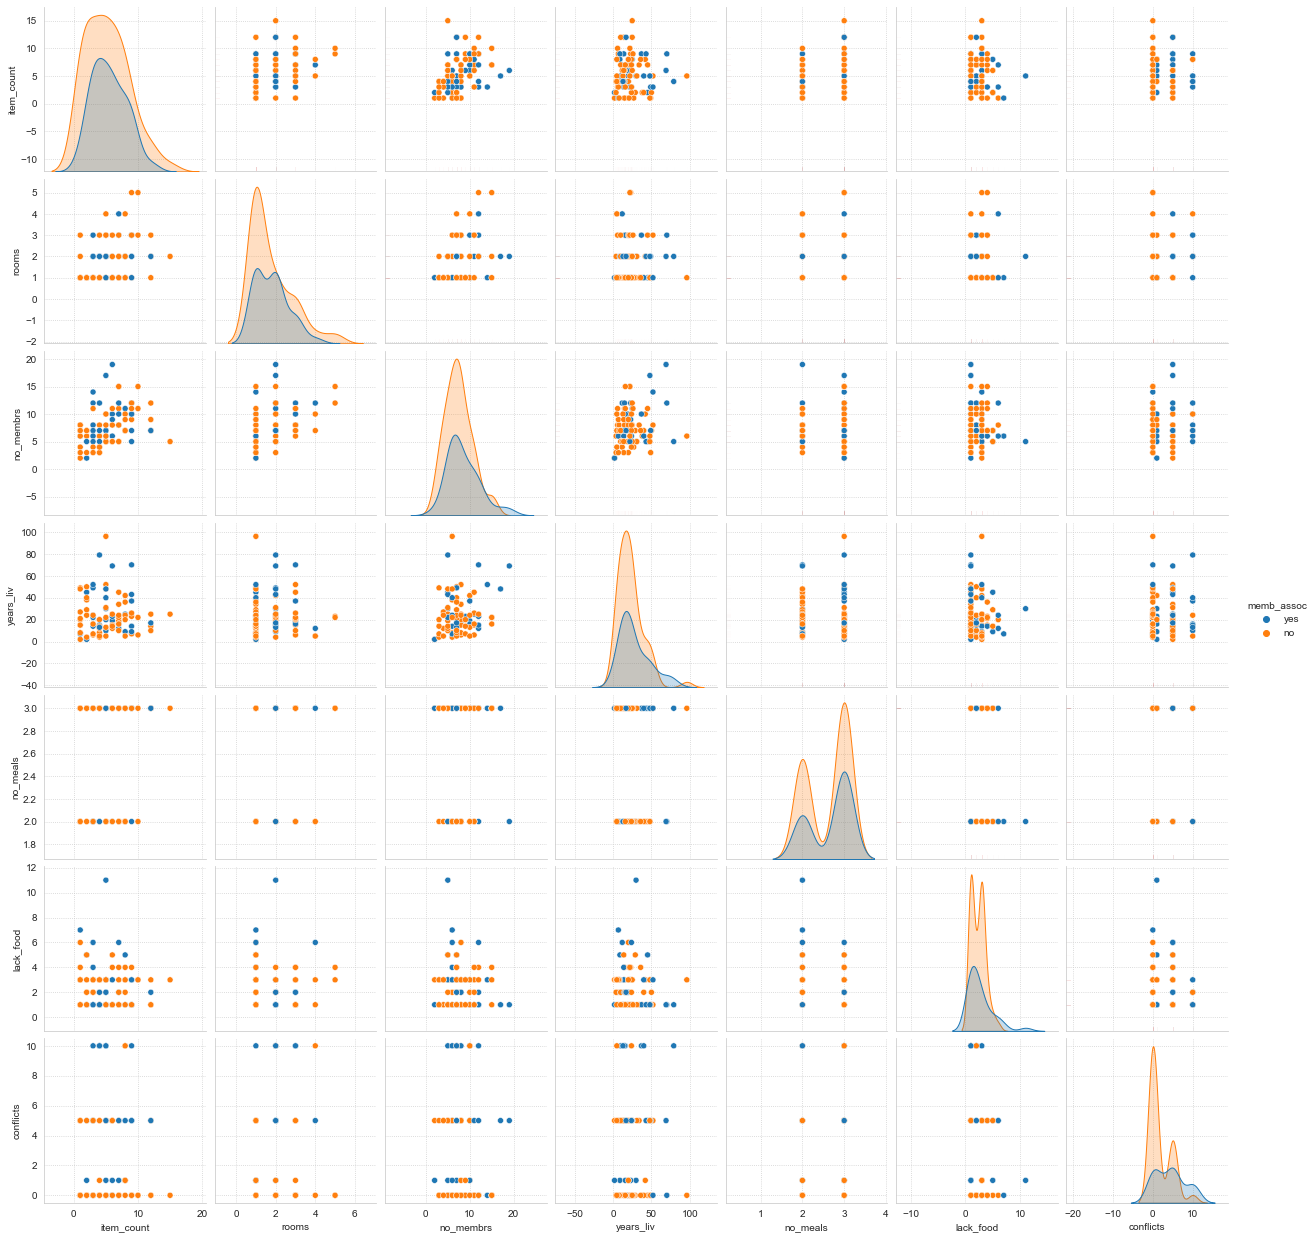

In [243]:

import seaborn as sns

sns.set_style("whitegrid", {'grid.linestyle': ':'})
g = sns.pairplot(data=safi_plot_data.dropna(how='all'), hue='memb_assoc', vars=[
                 'item_count', 'rooms', 'no_membrs', 'years_liv', 'no_meals', 'lack_food', 'conflicts'])
# g.map_upper(sns.histplot, discrete=True,multiple="layer", alpha=.005                                                                                            )
g.map_upper(sns.rugplot, kwargs={alpha: .005})
g.map_lower(sns.regplot, kwargs={alpha: .005})

In [241]:
conf = safi.loc[:,['affect_conflicts', 'memb_assoc']]
count = conf.groupby('memb_assoc').count()
group_conflicts = pd.DataFrame( conf.groupby('memb_assoc').value_counts()).join(count, on="memb_assoc").rename(columns={'affect_conflicts':'grp_total'})
group_conflicts['ratio']= group_conflicts['count']/group_conflicts['grp_total']
group_conflicts.reset_index()

,memb_assoc,affect_conflicts,count,grp_total,ratio
0,no,never,38,59,0.644068
1,no,more_once,16,59,0.271186
2,no,once,3,59,0.050847
3,no,frequently,2,59,0.033898
4,yes,more_once,13,33,0.393939
5,yes,never,8,33,0.242424
6,yes,frequently,7,33,0.212121
7,yes,once,5,33,0.151515


<Axes: xlabel='affect_conflicts', ylabel='ratio'>

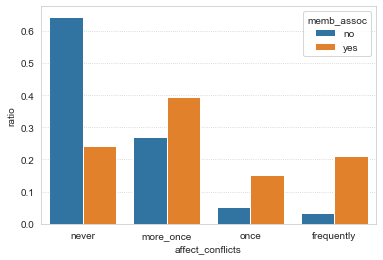

In [242]:
sns.barplot(data=group_conflicts.reset_index(), hue='memb_assoc', x="affect_conflicts", y="ratio")

            item_count     rooms  no_membrs  years_liv  no_meals  lack_food   
item_count    1.000000  0.329812   0.391102   0.004220  0.264509  -0.159781  \
rooms         0.329812  1.000000   0.302930   0.045716 -0.007113  -0.062420   
no_membrs     0.391102  0.302930   1.000000   0.206408  0.103304  -0.065449   
years_liv     0.004220  0.045716   0.206408   1.000000  0.022946  -0.104815   
no_meals      0.264509 -0.007113   0.103304   0.022946  1.000000  -0.153009   
lack_food    -0.159781 -0.062420  -0.065449  -0.104815 -0.153009   1.000000   
conflicts     0.049745  0.150433  -0.047092   0.042990  0.115289  -0.168633   
member        0.041069  0.020803   0.157062   0.143209  0.056138   0.094069   

            conflicts    member  
item_count   0.049745  0.041069  
rooms        0.150433  0.020803  
no_membrs   -0.047092  0.157062  
years_liv    0.042990  0.143209  
no_meals     0.115289  0.056138  
lack_food   -0.168633  0.094069  
conflicts    1.000000  0.364818  
member       0.3

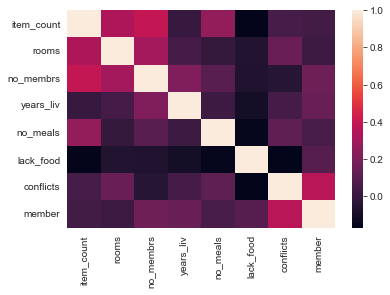

In [208]:
numeric_cols = safi_plot_data.select_dtypes(include=np.number)

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Print the correlation matrix
print(correlation_matrix)


cm = sns.heatmap(data=correlation_matrix)